In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
##Generate fake data
target=45
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10
response_cw = np.random.normal(target + real_error, 5, 1000)
response_ccw = np.random.normal(target - real_error, 5, 1000)

cw=pd.DataFrame({'response':response_cw})
cw['target'] = 45
cw['orient'] = 'cw'
cw['distractor'] = target + distractor_dit

ccw=pd.DataFrame({'response':response_ccw})
ccw['target'] = 45
ccw['orient'] = 'ccw'
ccw['distractor'] = target - distractor_dit

df=pd.concat([cw, ccw], ignore_index=True)
df['error'] = df['target'] - df['response']
df.head(10)

,response,target,orient,distractor,error
0,45.008255,45,cw,55,-0.008255
1,51.390183,45,cw,55,-6.390183
2,42.695156,45,cw,55,2.304844
3,66.887918,45,cw,55,-21.887918
4,50.152117,45,cw,55,-5.152117
5,42.643411,45,cw,55,2.356589
6,51.752546,45,cw,55,-6.752546
7,45.827316,45,cw,55,-0.827316
8,51.966691,45,cw,55,-6.966691
9,57.266441,45,cw,55,-12.266441


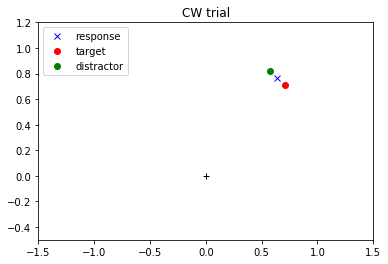

In [60]:
#### Visualize a cw trial
### target is cw to distractor.

ex_trial=4
plt.plot(0, 0, 'k+')
plt.plot( np.cos(   np.radians(df.iloc[ex_trial,0])    ), np.sin(    np.radians(df.iloc[ex_trial,0])    ), 'bx', label='response')
plt.plot( np.cos(   np.radians(df.iloc[ex_trial,1])    ), np.sin(    np.radians(df.iloc[ex_trial,1])    ), 'ro', label='target')
plt.plot( np.cos(   np.radians(df.iloc[ex_trial,3])    ), np.sin(    np.radians(df.iloc[ex_trial,3])    ), 'go', label='distractor')

plt.legend(loc=2)
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 1.2)
plt.title('CW trial')
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


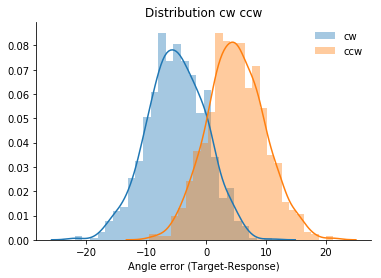

In [41]:
sns.distplot(df.loc[df['orient']=='cw', 'error'], label='cw')
sns.distplot(df.loc[df['orient']=='ccw', 'error'], label='ccw')
plt.title('Distribution cw ccw')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()

## Compare interference function vs distance error function

### 1. Center of the quadrant

##### Interference function

In [42]:
def circ_dist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)




def Interference_effects(target, response, reference):
    #input list of target, list of responses and list of references
    #Error_interference; positive for attraction and negative for repulsion
    #######
    #Decimals to get
    decimals=2
    ####
    interferences=[]
    for i in range(0, len(target)):
        angle_err_abs=abs(target[i] - response[i])
        if circ_dist(np.array(response)[i], np.array(reference)[i])<=circ_dist(np.array(target)[i], np.array(reference)[i]):
            Err_interference=round( angle_err_abs, decimals) 
        else:
            Err_interference=round( -angle_err_abs, decimals)

        interferences.append(Err_interference)
    
    return interferences



values = Interference_effects(   list(df['target']),   list(df['response']),  list(df['distractor'])  )
print( round(np.mean(values)) )

df['interference_error'] = values


5.0


#### Distance function

In [49]:
means_cw_ccw={}

for ori in ['cw', 'ccw']:
    mean = round(df.loc[ df['orient']==ori,  'error'].mean(), 3)
    means_cw_ccw[ori] = mean

    
print(means_cw_ccw)


cw_ccw_distance=[]

for i in df.index:
    or_ = df.loc[i, 'orient']
    if or_ == 'cw':
        or_cont = 'ccw'
    elif or_ =='ccw':
        or_cont = 'cw' 
    else:
        print('Error')
    idx =  or_cont
    #
    if or_ == 'ccw':
        cw_ccw_distance.append(df.loc[i, 'error'] - means_cw_ccw[idx] )  
    elif or_ =='cw':
        cw_ccw_distance.append( means_cw_ccw[idx] - df.loc[i, 'error'])  
    else:
        print('Error')
    


print( round(np.mean(np.array(cw_ccw_distance)/2)) )
df['error distance'] =np.array(cw_ccw_distance)/2




{'cw': -4.994, 'ccw': 4.99}
5.0


Both work exactly the same way!

### 2. Around the axis!